In [4]:
from autometrics.dataset.datasets.simplification import SimpDA
from autometrics.util.analysis import display_top_5_metrics_by_validation, get_top_metric_by_validation, plot_metric_target_scatterplot
from autometrics.evaluate.correlation import calculate_correlation
from autometrics.aggregator.regression.PLS import PLS
from autometrics.aggregator.regression import Ridge, ElasticNet, Lasso, RandomForest, GradientBoosting, Linear
from autometrics.aggregator.regression.BudgetRegression import BudgetRegression
from autometrics.generator.llm_judge_proposer import LLMJudgeProposer

In [5]:
dataset = SimpDA()

In [6]:
calculate_correlation(dataset)

{'score': {}}

In [4]:
train, dev, test = dataset.get_splits(train_ratio=0.2, val_ratio=0.1, seed=42)

In [5]:
display_top_5_metrics_by_validation(dev, test, False)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
time_sec,edited_note | Levenshtein dist. (-0.7918037570...,edited_note | WIL (-0.6588840227717595),edited_note | ROUGE-L-Re* (-0.613928828580811),edited_note | ROUGE-L-F1* (-0.6571340283095053),edited_note | BLEU* (-0.6550569554057697)
incorrect,edited_note | ROUGE-L-Pr* (-0.7769928679302135),max | ROUGE-L-Pr* (-0.7432622187550944),avg | WIL (-0.5855855925864584),max | WIL (-0.577098785499778),max | ROUGE-2-F1* (-0.572881867252673)
omissions,edited_note | Levenshtein dist. (-0.8147010748...,edited_note | BLEU* (-0.7869679083840544),edited_note | ROUGE-L-Re* (-0.7728796627697061),edited_note | METEOR* (-0.8102592938112041),edited_note | WMD (-0.7628137028823777)
inc_plus_omi,avg | WIL (-0.7337000553443466),edited_note | Levenshtein dist. (-0.8215430062...,edited_note | BertScore* (-0.8014333508586717),avg | ROUGE-4-F1* (-0.7406870690229901),max | ROUGE-2-F1* (-0.7260906607765181)


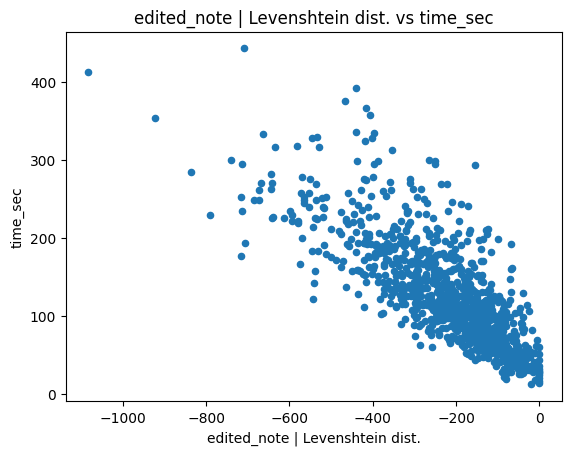

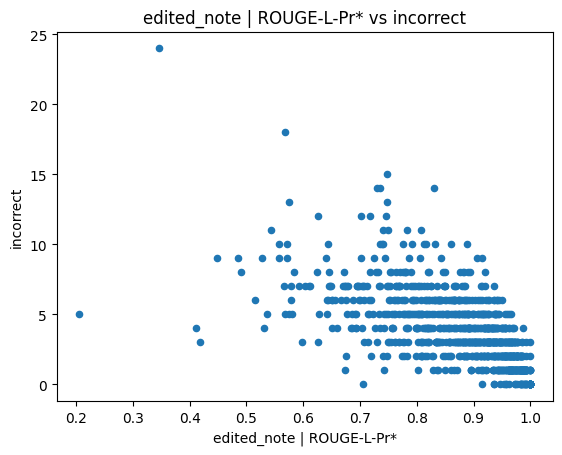

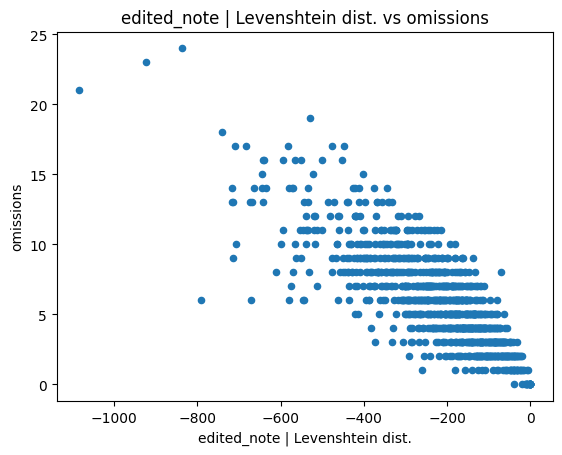

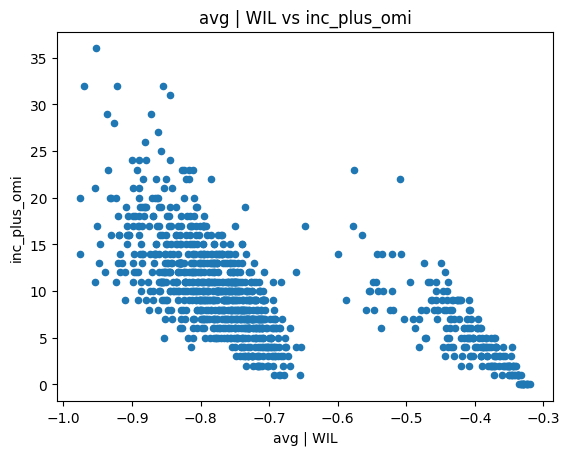

In [6]:
for target_column in dataset.target_columns:
    metric = get_top_metric_by_validation(dev, target_column, False)
    plot_metric_target_scatterplot(test, metric, target_column)

In [8]:
for model in [PLS, ElasticNet, Lasso, Ridge, RandomForest, GradientBoosting, Linear]:
    for target_column in dataset.target_columns:
        model_instance = model(dataset=train, name=model.__name__ + '_' + target_column)
        model_instance.learn(train, target_column)
        model_instance.predict(train, target_column)
        model_instance.predict(dev, target_column)
        model_instance.predict(test, target_column)

/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.679e+04, tolerance: 2.040e+02
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.815e+04, tolerance: 2.040e+02
  model = cd_fast.enet_coordinate_descent(


In [9]:
display_top_5_metrics_by_validation(dev, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
time_sec,Rg_time_sec (0.8223374670016869),Rg_omissions (0.74854385188165),Rg_inc_plus_omi (0.7758587318384566),edited_note | Levenshtein dist. (-0.7918037570...,ENet_time_sec (0.813253504912963)
incorrect,Rg_incorrect (0.7816079186424769),edited_note | ROUGE-L-Pr* (-0.7769928679302135),PLS_incorrect (0.7793636361349978),RandomForest_incorrect (0.780726807609988),max | ROUGE-L-Pr* (-0.7432622187550944)
omissions,Rg_omissions (0.842425821453117),ENet_omissions (0.8314605130105857),L_omissions (0.8312221642358786),RandomForest_omissions (0.8368432751617144),RandomForest_inc_plus_omi (0.7937505520298539)
inc_plus_omi,Rg_inc_plus_omi (0.8553512554357171),RandomForest_inc_plus_omi (0.8504668188027519),GB_inc_plus_omi (0.8483119744553024),PLS_inc_plus_omi (0.8098946230496049),Rg_omissions (0.7951469068371283)


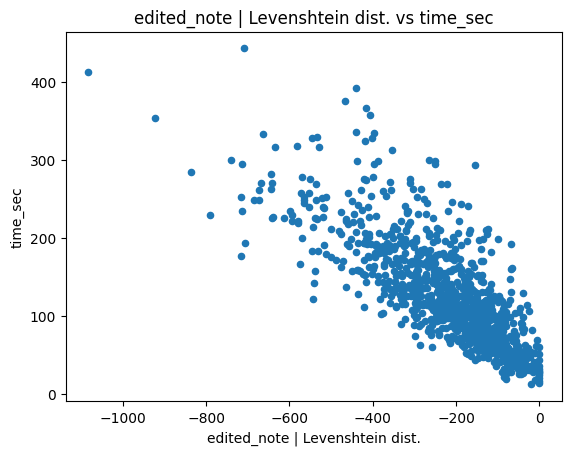

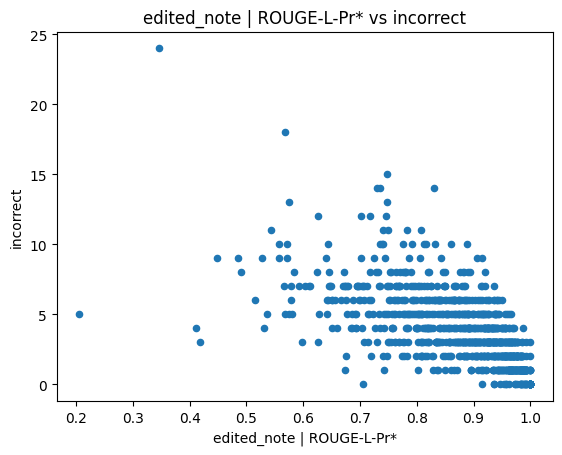

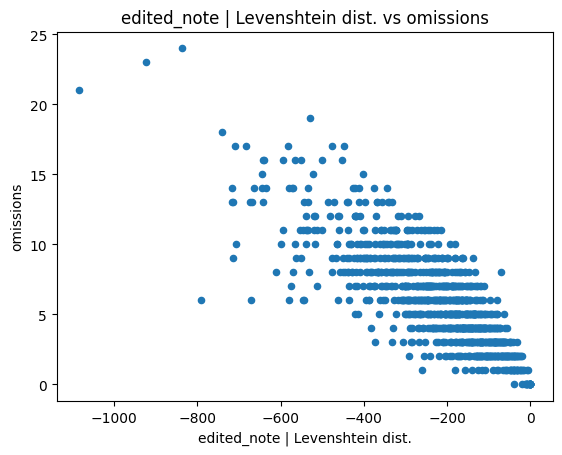

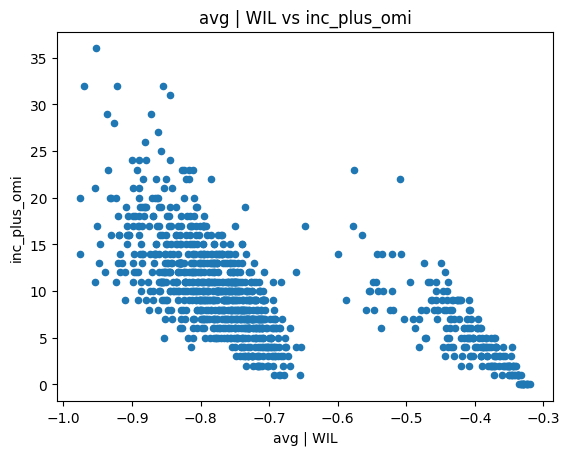

In [8]:
for target_column in dataset.target_columns:
    metric = get_top_metric_by_validation(dev, target_column, True)
    plot_metric_target_scatterplot(test, metric, target_column)


In [9]:
# Budget Runs
for model in [PLS, ElasticNet, Lasso, Ridge, RandomForest, GradientBoosting, Linear]:
    for budget in [2, 3, 5, 10, 15, 20, 25]:
        for target_column in dataset.target_columns:
            model_instance = model(dataset=train, name=model.__name__ + '_' + target_column)
            budget_model = BudgetRegression(model_instance, budget)
            budget_model.learn(train, target_column)
            budget_model.predict(train, target_column)
            budget_model.predict(dev, target_column)
            budget_model.predict(test, target_column)

/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.679e+04, tolerance: 2.040e+02
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.679e+04, tolerance: 2.040e+02
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

In [10]:
display_top_5_metrics_by_validation(dev, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
time_sec,RandomForest_time_secTop 5 (0.7470388477475411),GB_time_secTop 3 (0.7672616018625371),ENet_time_secTop 10 (0.7983245518312436),RandomForest_time_secTop 3 (0.7309518711710857),ENet_time_secTop 15 (0.7992218135459214)
incorrect,Rg_incorrectTop 2 (0.7906062745106216),RandomForest_incorrectTop 15 (0.786543697185868),edited_note | ROUGE-L-Pr* (-0.7769928679302135),RandomForest_incorrectTop 10 (0.7818354918628894),PLS_incorrectTop 10 (0.7571246554337578)
omissions,GB_omissionsTop 5 (0.8274941750572222),RandomForest_omissionsTop 10 (0.8371190047927137),RandomForest_omissionsTop 15 (0.8366531714425522),RandomForest_omissionsTop 20 (0.831948874806558),ENet_omissionsTop 10 (0.8314616546938851)
inc_plus_omi,RandomForest_inc_plus_omiTop 25 (0.85394217853...,RandomForest_inc_plus_omiTop 20 (0.85171024815...,RandomForest_inc_plus_omiTop 15 (0.84703477182...,GB_inc_plus_omiTop 25 (0.8363070308620161),GB_inc_plus_omiTop 10 (0.8335813762497263)


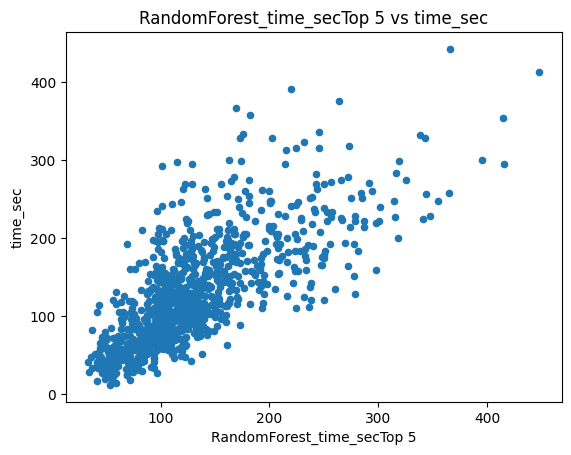

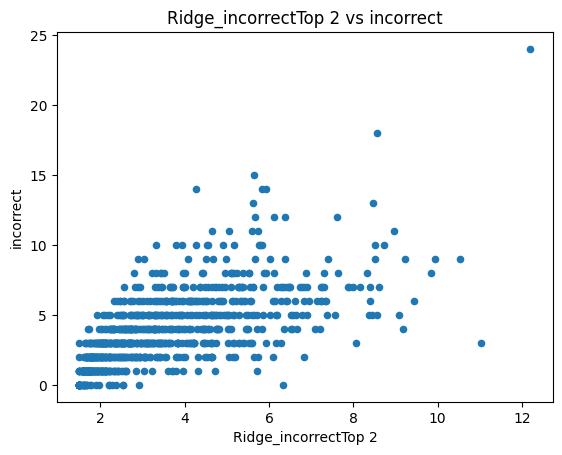

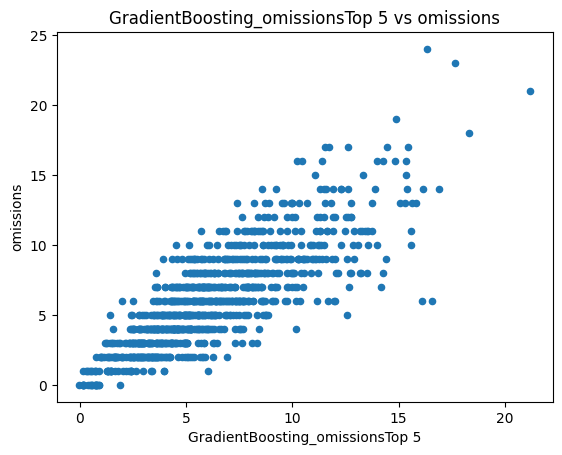

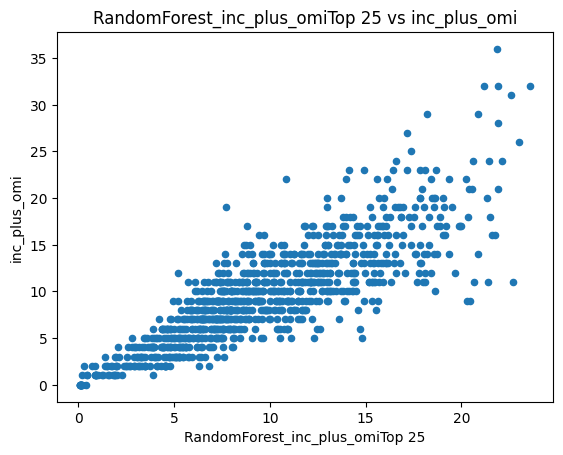

In [11]:
for target_column in dataset.target_columns:
    metric = get_top_metric_by_validation(dev, target_column, True)
    plot_metric_target_scatterplot(test, metric, target_column)

In [5]:
import dspy

# llama31_70b = dspy.HFClientVLLM(
#     model="meta-llama/Meta-Llama-3.1-70b-Instruct",
#     port=7410,
#     url="http://future-hgx-1",
#     max_tokens=512,
#     stop=["\n---", "\n\n", "<|eot_id|><|start_header_id|>assistant"],
#     model_type="chat"
# )

# llama31_70b.kwargs["max_tokens"] = 512
# llama31_70b.kwargs['stop'] = ["\n---", "\n\n", "<|eot_id|><|start_header_id|>assistant"]

llama31_70b = dspy.LM("openai/meta-llama/Meta-Llama-3.1-70b-Instruct", max_tokens=512, stop=["\n---", "\n\n", "<|eot_id|><|start_header_id|>assistant"], model_type="chat", port=7410, api_base="http://future-hgx-1")

dspy.settings.configure(lm=llama31_70b)

In [6]:
generator = LLMJudgeProposer(dataset=train, task_description="Write a high quality clinical note based on the transcript of a consultation with a patient.", proposer_model=llama31_70b, judge_model=llama31_70b)

In [7]:
for target_column in dataset.target_columns:
    print(generator.generate(train, target_column))


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm.set_verbose=True'.



AuthenticationError: litellm.AuthenticationError: AuthenticationError: OpenAIException - The api_key client option must be set either by passing api_key to the client or by setting the OPENAI_API_KEY environment variable